In [104]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import spotipy as sp
import numbers
import spotipy.util as util
import matplotlib.pyplot as plt
import pickle
from collections import Counter, defaultdict

In [74]:


SPOTIPY_REDIRECT_URI='http://localhost:8888/callback'
SPOTIPY_CLIENT_SECRET='c02f97ddd119470d8e24b290722c7490'
SPOTIPY_CLIENT_ID='647ffb8c163b4882be0cafe4bf1352d5'
USERNAME='lh7smhcywr18vctg4xmnoehzu'
SCOPE='user-library-read'

token = util.prompt_for_user_token(username=USERNAME,
                           scope=SCOPE,
                           client_id=SPOTIPY_CLIENT_ID,
                           client_secret=SPOTIPY_CLIENT_SECRET,
                           redirect_uri=SPOTIPY_REDIRECT_URI)

s = sp.Spotify(auth=token)

In [17]:
s.track("6I1mI4a0ZO7AGPCpKKxGip")

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2QOIawHpSlOwXDvSqQ9YJR'},
    'href': 'https://api.spotify.com/v1/artists/2QOIawHpSlOwXDvSqQ9YJR',
    'id': '2QOIawHpSlOwXDvSqQ9YJR',
    'name': 'Antonio Vivaldi',
    'type': 'artist',
    'uri': 'spotify:artist:2QOIawHpSlOwXDvSqQ9YJR'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/0sw0ZujTlpvzNDNPOXOKGC'},
    'href': 'https://api.spotify.com/v1/artists/0sw0ZujTlpvzNDNPOXOKGC',
    'id': '0sw0ZujTlpvzNDNPOXOKGC',
    'name': 'Gwennaëlle Alibert',
    'type': 'artist',
    'uri': 'spotify:artist:0sw0ZujTlpvzNDNPOXOKGC'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/6we3QFWKqhaa2lJESUd665'},
    'href': 'https://api.spotify.com/v1/artists/6we3QFWKqhaa2lJESUd665',
    'id': '6we3QFWKqhaa2lJESUd665',
    'name': 'Clément Geoffroy',
    'type': 'artist',
    'uri': 'spotify:artist:6we3QFWKqhaa2lJESUd665'}],
  'available_markets': ['AD',

In [4]:
names = ["classical_metafeatures", "hiphop_metafeatures", "rock_metafeatures", "house_metafeatures", "hardcore_metafeatures", "jazz_metafeatures", "k-pop_metafeatures", "grunge_metafeatures"]


In [71]:
data = pd.read_pickle("datasets/" + names[3])

In [72]:
def getTitle(trackid):
    
    return s.track(trackid)["name"]

In [75]:
data["title"] = data["track id"].apply(getTitle)

retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...5secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying .

In [79]:
pickle.dump(data, open('datasets/house_metafeatures', 'wb'))


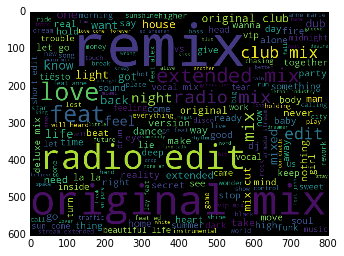

In [125]:
datahouse = pd.read_pickle("datasets/" + names[3])
cloudy = WordCloud(width=800, height=600).generate(" ".join(datahouse["title"]).lower())
plt.imshow(cloudy)
plt.show()

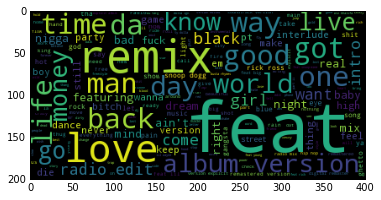

In [85]:
datahiphop = pd.read_pickle("datasets/" + names[1])

cloudy = WordCloud().generate(" ".join(datahiphop["title"]).lower())
plt.imshow(cloudy)
plt.show()

## Size of vocabulary

In [88]:
print("hiphop unique words: ", len(set(" ".join(datahiphop["title"]).lower().split())))
print("house unique words: ", len(set(" ".join(datahouse["title"]).lower().split())))

hiphop unique words:  7473
house unique words:  6879


## Zipfs law

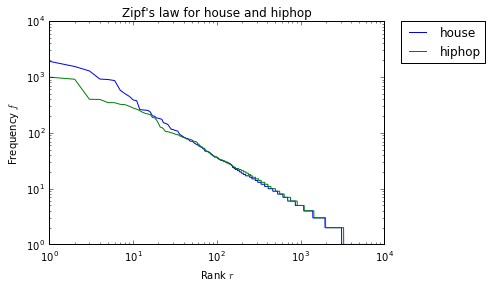

In [100]:
# plot house zipfslaw
word_dict = Counter(" ".join(datahouse["title"]).lower().split())
X = range(0, len(word_dict.values()))
Y = sorted(word_dict.values())[::-1]
plt.loglog(X, Y, label="house")

# plot hiphop zipfslaw
word_dict = Counter(" ".join(datahiphop["title"]).lower().split())
X = range(0, len(word_dict.values()))
Y = sorted(word_dict.values())[::-1]
plt.loglog(X, Y, label="hiphop")


plt.yscale('log')
plt.title("Zipf's law for house and hiphop")
plt.xlabel("Rank $r$")
plt.ylabel("Frequency $f$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

# Bogus text titles!

In [109]:
def all_ngrams(text, n):
    start = 0
    end = n
    ngrams = []
    while(end != len(text) + 1):
        ngrams += [text[start:end]]
        start += 1
        end += 1
    return ngrams

# For every ngram there is a dictionary containing the possible following ngrams with the frequency of this
# happening. 
def ngram_conditional_frequencies(text, ngram_length):
    ngrams = all_ngrams(text, ngram_length)
    inverted_index = defaultdict(Counter)
    for current, following in zip(ngrams, ngrams[1:]):
        if (current in inverted_index.keys()):
            if (following in  inverted_index[current].keys()):
                inverted_index[current][following] += 1
            else :
                inverted_index[current][following] = 1
        else:
            inverted_index[current] = defaultdict(Counter)
            inverted_index[current][following] = 1
    return inverted_index

In [123]:
all_texts = [" ".join(datahouse["title"]).lower(), " ".join(datahiphop["title"]).lower()]
inverted_indexes = []
for text in all_texts:
    inverted_indexes += [ngram_conditional_frequencies(text, 4)]

In [124]:
# The input, current_ngram, is the piece of text you would like the paragraph to start with.
def plagiarize_text(max_length, inverted_index, current_ngram = "and "):
    length = 4
    result_string = current_ngram
    # keep adding letters until the appropriate length has been reached
    while max_length >= length:
        # pick the index of the next ngram
        current_dict = inverted_index[current_ngram]
        index = np.random.randint(0, np.sum(list(current_dict.values())))
        total = 0
        # Find which key belongs to this index
        for key in current_dict.keys():
            total += current_dict[key]
            if total > index:
                result_string = result_string + key[1]
                current_ngram = key
                length += 1
                break
    return result_string
print("house: ", plagiarize_text(300, inverted_indexes[0]))
print()
print("hiphop: ", plagiarize_text(300, inverted_indexes[1]))

house:  and d arace me - original mix happy - club remix all i can't stop the techno) - instreet like (feat. march of men on - original mix tarano hall gonna benedicinema - radio edit fly - extended mix yoohoo far life waster lead at the morning - quintinatore to the end - original mix slow step stimulater -

hiphop:  and d meet me rebel me berman 9 throwed a roses in the move you withouse remix bitch better supercut you needs me) keep ya bran' no rick ross) rick rapped iz life cott) the boosie) - james as your lifted hyyerr i'm the doors (feat. platformed like truth me nothing) - album better habitate night world
